**1.0 IMPORT STANDARD LIBRARIES**





In [113]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

**2.0 UPLOAD national-history.csv FILE**

In [114]:
from google.colab import files
uploaded = files.upload()

Saving national-history.csv to national-history (1).csv


**3.0 READ .csv FILE**

In [115]:
import io
df = pd.read_csv(io.BytesIO(uploaded['national-history.csv']))
df = pd.DataFrame(df)
df.head()
# Dataset is now stored in a Pandas Dataframe

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-09-24,194852.0,921,19555.0,6158.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98481026,940415
1,2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97540611,923832
2,2020-09-22,192774.0,854,19324.0,6119.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96616779,769854
3,2020-09-21,191920.0,287,19353.0,6055.0,1140,28755.0,396355.0,85942856,639272,2116.0,1572.0,0,6810133,39472,2615974.0,56,95846925,725329
4,2020-09-20,191633.0,327,19281.0,6015.0,516,28608.0,395215.0,85303584,790601,2112.0,1595.0,0,6770661,36295,2589239.0,56,95121596,905387


**4.0 DATAFRAME EXPLORATION**

In [116]:
df.dtypes #checking our dtypes for our df

date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
negative                      int64
negativeIncrease              int64
onVentilatorCumulative      float64
onVentilatorCurrently       float64
posNeg                        int64
positive                      int64
positiveIncrease              int64
recovered                   float64
states                        int64
totalTestResults              int64
totalTestResultsIncrease      int64
dtype: object

We can see that our date column needs to be transformed to a **datetime** **dtype**
Our positiveIncrease column ( which we will use to cumulate previous 7 days figures ) is already in **int64 dtye** - this is fine.
First we will transform the "date" column to datetime dtype


In [117]:
# using pandas datetime function
df['date']= pd.to_datetime(df['date']) 
df['date'].dtype
df.dtypes

date                        datetime64[ns]
death                              float64
deathIncrease                        int64
inIcuCumulative                    float64
inIcuCurrently                     float64
hospitalizedIncrease                 int64
hospitalizedCurrently              float64
hospitalizedCumulative             float64
negative                             int64
negativeIncrease                     int64
onVentilatorCumulative             float64
onVentilatorCurrently              float64
posNeg                               int64
positive                             int64
positiveIncrease                     int64
recovered                          float64
states                               int64
totalTestResults                     int64
totalTestResultsIncrease             int64
dtype: object

In [118]:
df.head() # rechecking our df

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-09-24,194852.0,921,19555.0,6158.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98481026,940415
1,2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97540611,923832
2,2020-09-22,192774.0,854,19324.0,6119.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96616779,769854
3,2020-09-21,191920.0,287,19353.0,6055.0,1140,28755.0,396355.0,85942856,639272,2116.0,1572.0,0,6810133,39472,2615974.0,56,95846925,725329
4,2020-09-20,191633.0,327,19281.0,6015.0,516,28608.0,395215.0,85303584,790601,2112.0,1595.0,0,6770661,36295,2589239.0,56,95121596,905387


**DATA ENGINEERING**

**5.1 Additional Variables Creation**

5.1.1 Rolling SUM for number of positive cases seen in the 7 day period immediately before a date (i.e. including the date as day 1)

5.1.2 Rolling AVERAGE for number of positive cases seen in the 7 day period starting from this date (i.e. NOT including this date as day 1) 

5.1.2 Rolling SUM for number of positive cases seen in the 7 day period starting from this date (i.e. NOT including this date as day 1)



In [119]:
df['last_7'] = df['positiveIncrease'].rolling(7).sum().shift(-7) #creating the 'last_7' new variable
df['last_7ave'] = df['positiveIncrease'].rolling(7).mean().shift(-7) #creating the 'last_7ave' new variable
df.head(10)

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease,last_7,last_7ave
0,2020-09-24,194852.0,921,19555.0,6158.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98481026,940415,300356.0,42908.000000
1,2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97540611,923832,301810.0,43115.714286
2,2020-09-22,192774.0,854,19324.0,6119.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96616779,769854,287816.0,41116.571429
3,2020-09-21,191920.0,287,19353.0,6055.0,1140,28755.0,396355.0,85942856,639272,2116.0,1572.0,0,6810133,39472,2615974.0,56,95846925,725329,282208.0,40315.428571
4,2020-09-20,191633.0,327,19281.0,6015.0,516,28608.0,395215.0,85303584,790601,2112.0,1595.0,0,6770661,36295,2589239.0,56,95121596,905387,280366.0,40052.285714
5,2020-09-19,191306.0,740,19243.0,6070.0,1067,29035.0,394699.0,84512983,946890,2111.0,1577.0,0,6734366,45539,2577467.0,56,94216209,1066157,276914.0,39559.142857
6,2020-09-18,190566.0,901,19163.0,6175.0,1459,29501.0,393632.0,83566093,856141,2107.0,1608.0,0,6688827,47486,2557862.0,56,93150052,986403,274355.0,39193.571429
7,2020-09-17,189665.0,863,19057.0,6277.0,1549,29900.0,392173.0,82709952,733211,2092.0,1658.0,0,6641341,43558,2540334.0,56,92163649,842518,268378.0,38339.714286
8,2020-09-16,188802.0,1200,18961.0,6308.0,1517,30278.0,390624.0,81976741,625601,2090.0,1651.0,0,6597783,40021,2525573.0,56,91321131,729837,259340.0,37048.571429
9,2020-09-15,187602.0,1031,18847.0,6310.0,1491,30328.0,389107.0,81351140,649588,2071.0,1572.0,0,6557762,35445,2495127.0,56,90591294,726745,246118.0,35159.714286


In [120]:
df['next_7'] = df['positiveIncrease'].rolling(7).sum().shift(1) #creating the 'next_7' new variable
df.head(10)

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease,last_7,last_7ave,next_7
0,2020-09-24,194852.0,921,19555.0,6158.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98481026,940415,300356.0,42908.000000,NaN
1,2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97540611,923832,301810.0,43115.714286,NaN
2,2020-09-22,192774.0,854,19324.0,6119.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96616779,769854,287816.0,41116.571429,NaN
3,2020-09-21,191920.0,287,19353.0,6055.0,1140,28755.0,396355.0,85942856,639272,2116.0,1572.0,0,6810133,39472,2615974.0,56,95846925,725329,282208.0,40315.428571,NaN
4,2020-09-20,191633.0,327,19281.0,6015.0,516,28608.0,395215.0,85303584,790601,2112.0,1595.0,0,6770661,36295,2589239.0,56,95121596,905387,280366.0,40052.285714,NaN
5,2020-09-19,191306.0,740,19243.0,6070.0,1067,29035.0,394699.0,84512983,946890,2111.0,1577.0,0,6734366,45539,2577467.0,56,94216209,1066157,276914.0,39559.142857,NaN
6,2020-09-18,190566.0,901,19163.0,6175.0,1459,29501.0,393632.0,83566093,856141,2107.0,1608.0,0,6688827,47486,2557862.0,56,93150052,986403,274355.0,39193.571429,NaN
7,2020-09-17,189665.0,863,19057.0,6277.0,1549,29900.0,392173.0,82709952,733211,2092.0,1658.0,0,6641341,43558,2540334.0,56,92163649,842518,268378.0,38339.714286,300570.0
8,2020-09-16,188802.0,1200,18961.0,6308.0,1517,30278.0,390624.0,81976741,625601,2090.0,1651.0,0,6597783,40021,2525573.0,56,91321131,729837,259340.0,37048.571429,300356.0
9,2020-09-15,187602.0,1031,18847.0,6310.0,1491,30328.0,389107.0,81351140,649588,2071.0,1572.0,0,6557762,35445,2495127.0,56,90591294,726745,246118.0,35159.714286,301810.0


# **6.0 DATA VISUALIZATION**

To get a feel for the data I will generate some line plots

In [121]:
%matplotlib inline

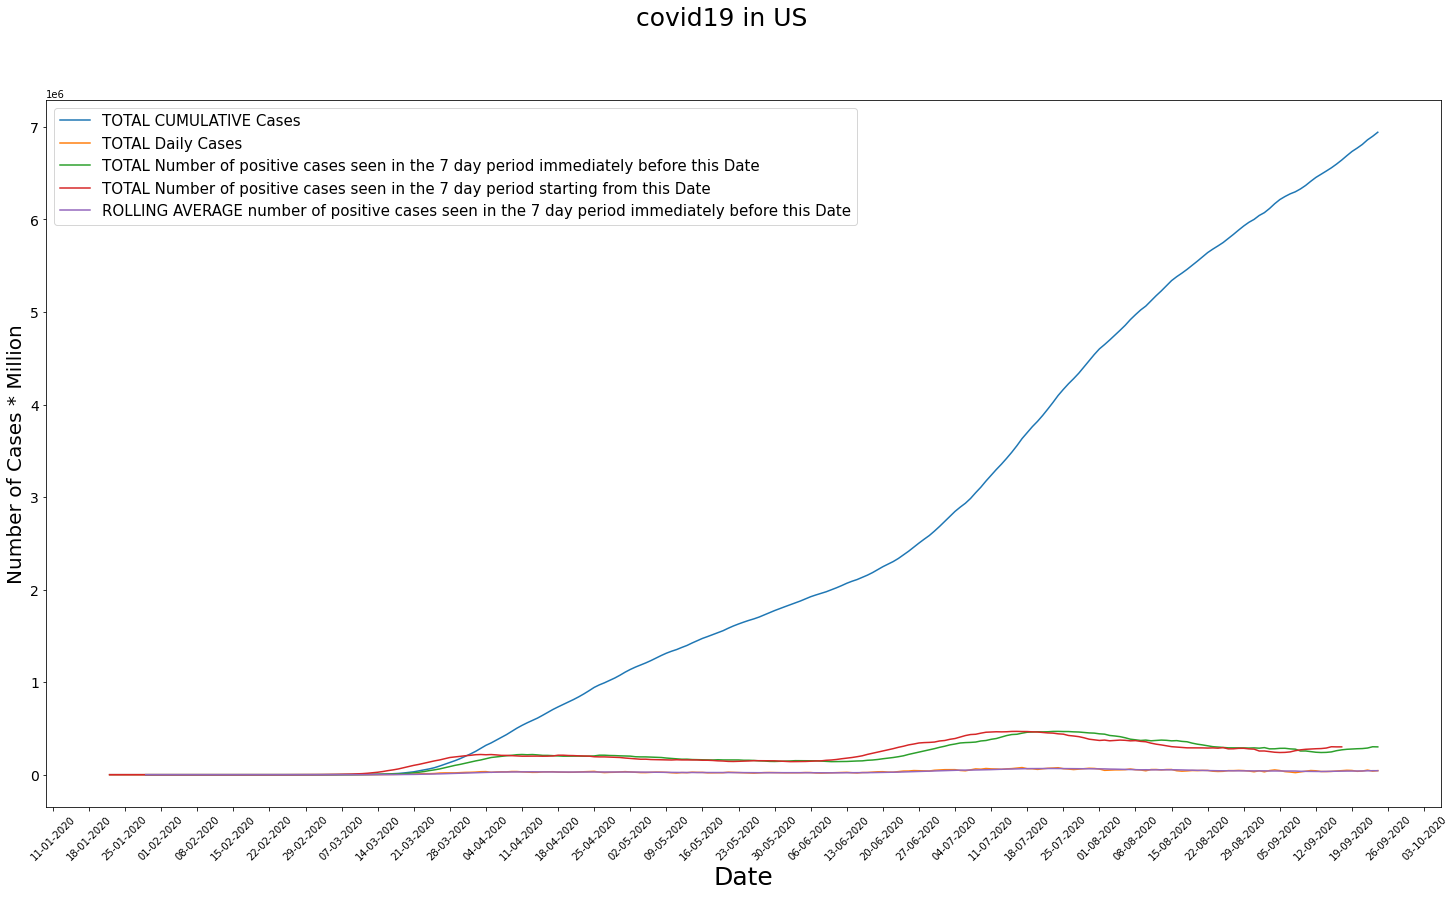

In [122]:
import matplotlib.dates as mdates # we need this library to format the dates in our x axis

fig, (ax1) = plt.subplots(1, figsize=(25,13)) 
fig.suptitle('covid19 in US', fontsize=25)

x = df['date'] 
y1 = df.positive 
y2 = df.positiveIncrease 
y3 = df.last_7 
y4 = df.next_7 
y5 = df.last_7ave

#plot the data
plt.plot(x,y1,label='TOTAL CUMULATIVE Cases') 
plt.plot(x,y2,label='TOTAL Daily Cases') 
plt.plot(x,y3,label='TOTAL Number of positive cases seen in the 7 day period immediately before this Date') 
plt.plot(x,y4, label='TOTAL Number of positive cases seen in the 7 day period starting from this Date') 
plt.plot(x,y5, label='ROLLING AVERAGE number of positive cases seen in the 7 day period immediately before this Date')

#Add axis labels
plt.xlabel("Date", fontsize=25) 
plt.ylabel("Number of Cases * Million", fontsize=20) 
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=14)

#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the plot
plt.legend(fontsize = 15, loc = 2) 
plt.show()


[Its clear that the TOTAL CUMULATIVE CASES in on a different scale to the other 4 plots (i.e. ROLLING SUMS and AVERAGES) . Therefore weneed to plotted these their own

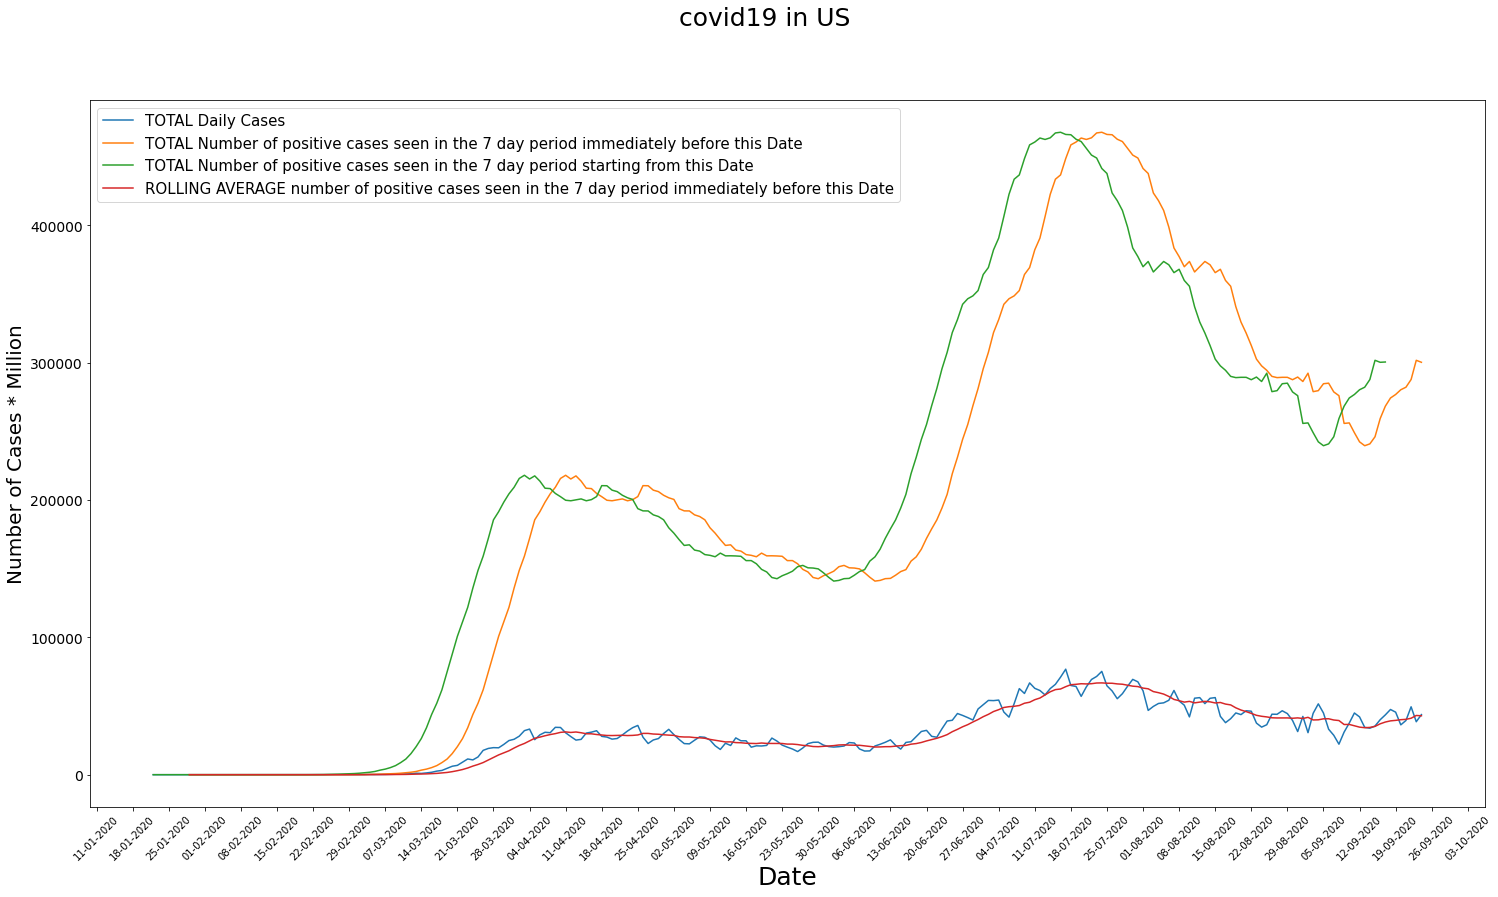

In [123]:
fig, (ax1) = plt.subplots(1, figsize=(25,13)) 
fig.suptitle('covid19 in US', fontsize=25)

x = df['date'] 
y1 = df.positiveIncrease 
y2 = df.last_7 
y3 = df.next_7 
y4 = df.last_7ave

#plot the data
plt.plot(x,y1,label='TOTAL Daily Cases') 
plt.plot(x,y2,label='TOTAL Number of positive cases seen in the 7 day period immediately before this Date') 
plt.plot(x,y3, label='TOTAL Number of positive cases seen in the 7 day period starting from this Date') 
plt.plot(x,y4, label='ROLLING AVERAGE number of positive cases seen in the 7 day period immediately before this Date')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

#Add axis labels
plt.xlabel("Date", fontsize=25) 
plt.ylabel("Number of Cases * Million", fontsize=20) 
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=14)

#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the plot
plt.legend(fontsize = 15, loc = 2) 
plt.show()

It has also become clear that the Daily TOTAL and AVERAGES plots , also need to be plotted on their own as they are on a different scale

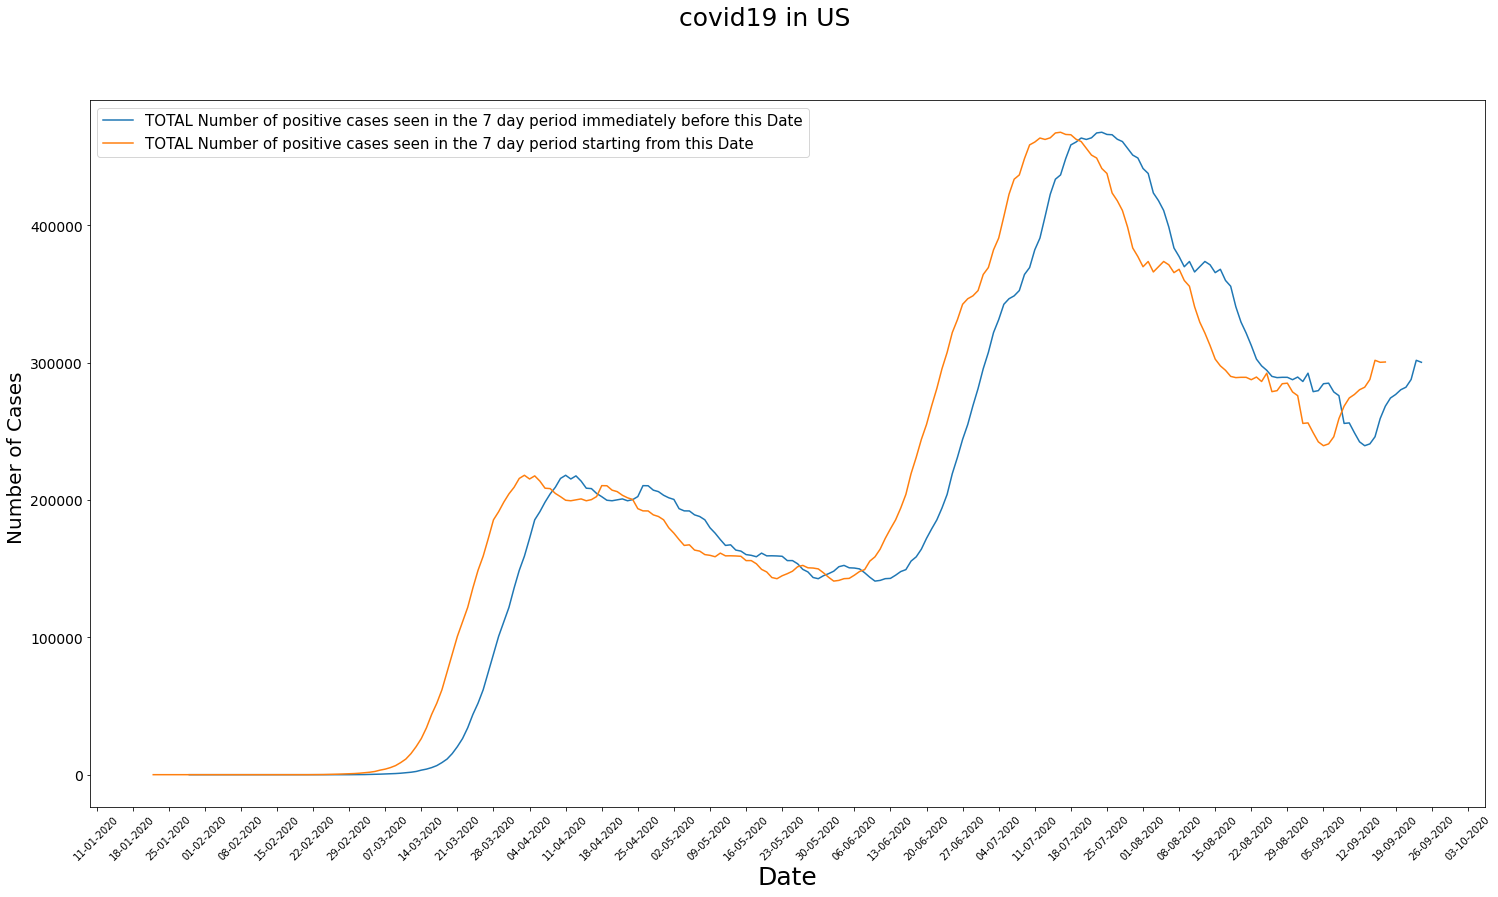

In [124]:
fig, (ax1) = plt.subplots(1, figsize=(25,13)) #Plotting Daily Total and Rolling 7 Day Average
fig.suptitle('covid19 in US', fontsize=25)

x = df['date']
y1 = df.last_7
y2 = df.next_7

# plot the data
plt.plot(x,y1,label='TOTAL Number of positive cases seen in the 7 day period immediately before this Date')
plt.plot(x,y2, label='TOTAL Number of positive cases seen in the 7 day period starting from this Date')

# Add axis labels
plt.xlabel("Date", fontsize=25)
plt.ylabel("Number of Cases ", fontsize=20)
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=14)


#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the plot
plt.legend(fontsize = 15, loc = 2)
plt.show()

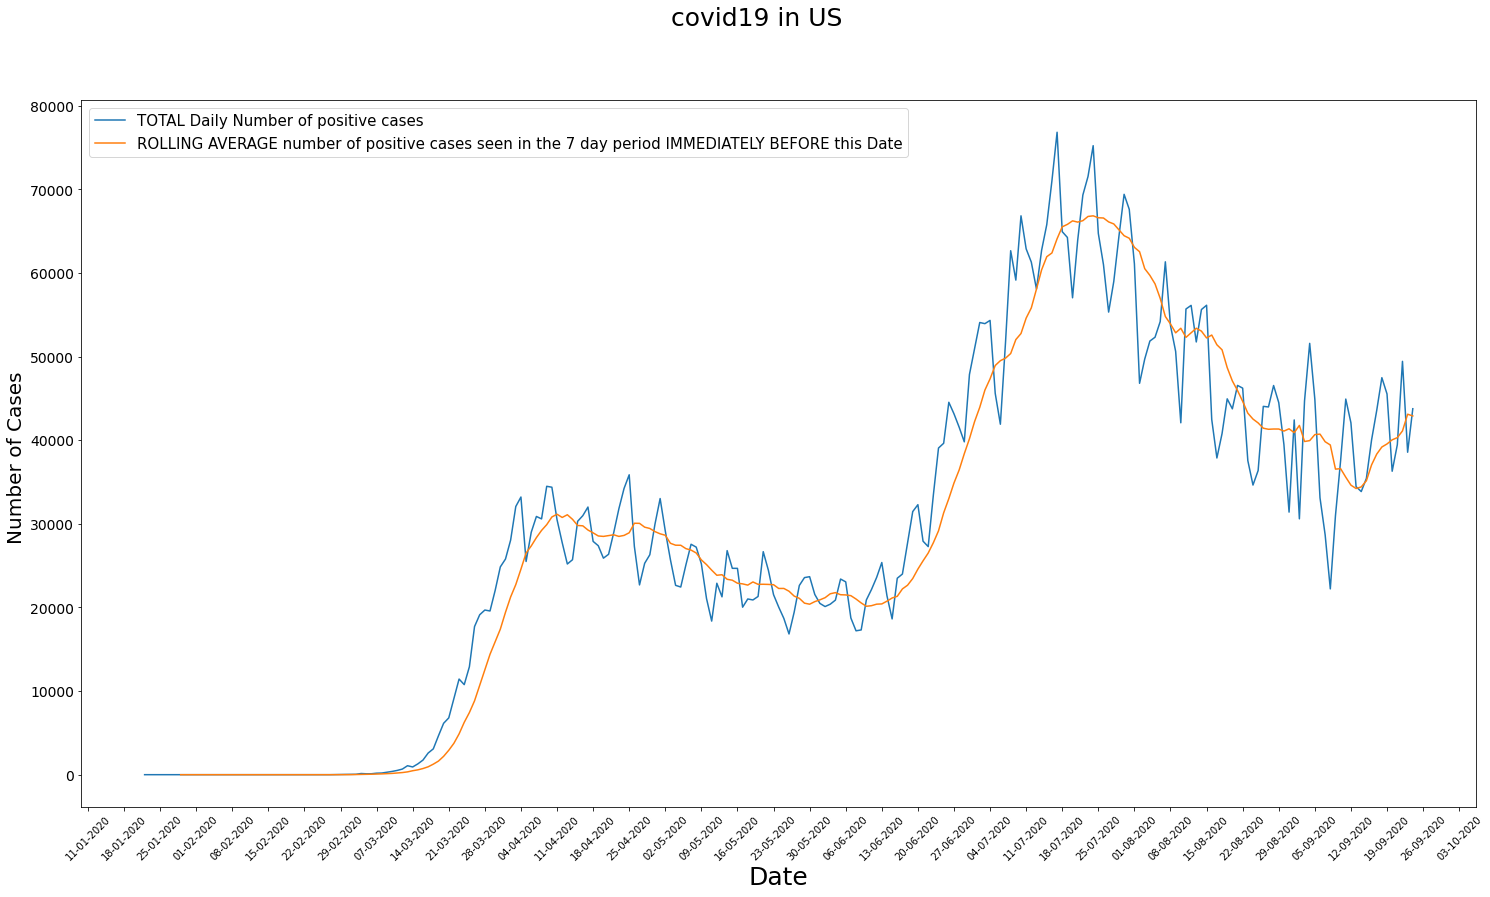

In [125]:
fig, (ax1) = plt.subplots(1, figsize=(25,13)) #Plotting Daily Total and Rolling 7 Day Average
fig.suptitle('covid19 in US', fontsize=25)

x = df['date']
y1 = df.positiveIncrease
y2 = df.last_7ave

# plot the data
plt.plot(x,y1,label='TOTAL Daily Number of positive cases')
plt.plot(x,y2, label='ROLLING AVERAGE number of positive cases seen in the 7 day period IMMEDIATELY BEFORE this Date')

# Add axis labels
plt.xlabel("Date", fontsize=25)
plt.ylabel("Number of Cases ", fontsize=20)
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=14)


#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the plot
plt.legend(fontsize = 15, loc = 2)
plt.show()

# **7.0 ADDITIONAL DATA ENGINEERING**

It seems logical to check if there is an interesting trend per particular weeks or even for which days of the week produce the highest and indeed lowest average numbers for positive cases
We will start by exploring the weeks in this dataset

**7.1 Exploring Weekly Data**

We will explorwe the average number of positive cases per each weeks worth of data that we have in the data set

We will use the pandas function dt.to_period('W') to define every Monday as the start of a new week

In [126]:
df['week_starting_on'] = df['date'].dt.to_period('W').apply(lambda x: x.start_time)
df.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease,last_7,last_7ave,next_7,week_starting_on
0,2020-09-24,194852.0,921,19555.0,6158.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98481026,940415,300356.0,42908.000000,NaN,2020-09-21
1,2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97540611,923832,301810.0,43115.714286,NaN,2020-09-21
2,2020-09-22,192774.0,854,19324.0,6119.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96616779,769854,287816.0,41116.571429,NaN,2020-09-21
3,2020-09-21,191920.0,287,19353.0,6055.0,1140,28755.0,396355.0,85942856,639272,2116.0,1572.0,0,6810133,39472,2615974.0,56,95846925,725329,282208.0,40315.428571,NaN,2020-09-21
4,2020-09-20,191633.0,327,19281.0,6015.0,516,28608.0,395215.0,85303584,790601,2112.0,1595.0,0,6770661,36295,2589239.0,56,95121596,905387,280366.0,40052.285714,NaN,2020-09-14


Next we will group the positiveIncrease data per each "start_of_week" and will return a sum for each week


In [127]:
weekly_sum = df.groupby('week_starting_on')['positiveIncrease'].sum().reset_index()
weekly_sum.columns = ["week_starting_on", "Weekly_Increase"]
weekly_sum.head()


,week_starting_on,Weekly_Increase
0,2020-01-20,0
1,2020-01-27,0
2,2020-02-03,0
3,2020-02-10,0
4,2020-02-17,0


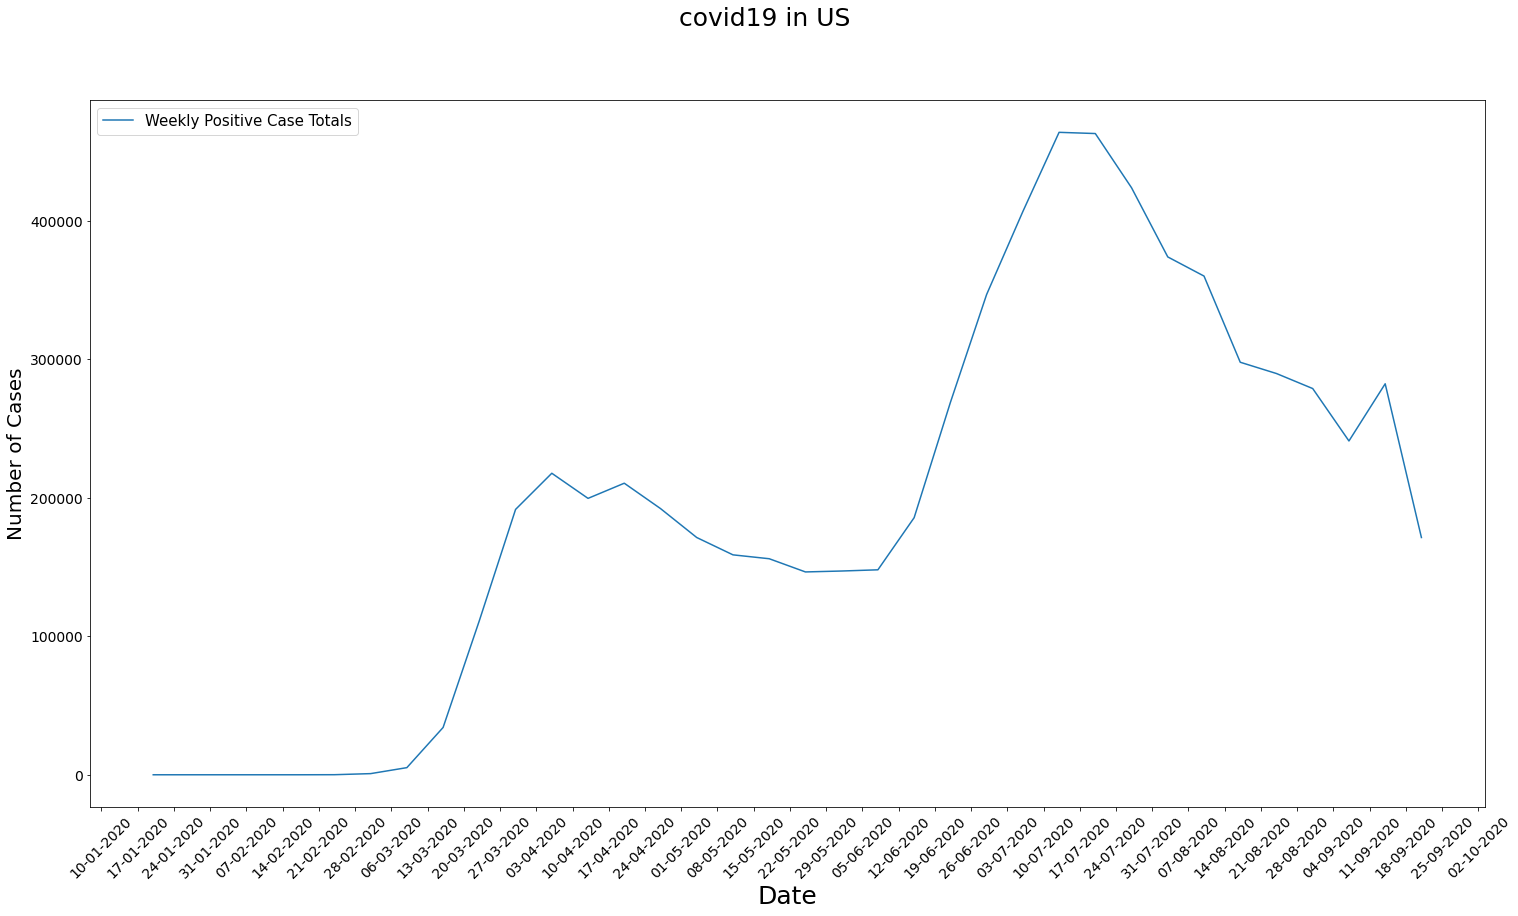

In [128]:
fig, (ax1) = plt.subplots(1, figsize=(25,13))
fig.suptitle('covid19 in US', fontsize=25)

x = weekly_sum['week_starting_on']
y1 = weekly_sum.Weekly_Increase

# plot the data
plt.plot(x,y1, label='Weekly Positive Case Totals')

# Add axis labels
plt.xlabel("Date", fontsize=25)
plt.ylabel("Number of Cases", fontsize=20)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the plot
plt.legend(fontsize = 15, loc = 2)
plt.show()

**7.2 Exploring Day of the Week Totals**

Next we will have a look at the averager numbe of positive cases for each day of the week. We will use the pandas dt.day_name function to obtain the days of the week for each date we have in the dataset

In [129]:
import datetime
df['day_of_week'] = df['date'].dt.day_name()
df.head()


,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease,last_7,last_7ave,next_7,week_starting_on,day_of_week
0,2020-09-24,194852.0,921,19555.0,6158.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98481026,940415,300356.0,42908.000000,NaN,2020-09-21,Thursday
1,2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97540611,923832,301810.0,43115.714286,NaN,2020-09-21,Wednesday
2,2020-09-22,192774.0,854,19324.0,6119.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96616779,769854,287816.0,41116.571429,NaN,2020-09-21,Tuesday
3,2020-09-21,191920.0,287,19353.0,6055.0,1140,28755.0,396355.0,85942856,639272,2116.0,1572.0,0,6810133,39472,2615974.0,56,95846925,725329,282208.0,40315.428571,NaN,2020-09-21,Monday
4,2020-09-20,191633.0,327,19281.0,6015.0,516,28608.0,395215.0,85303584,790601,2112.0,1595.0,0,6770661,36295,2589239.0,56,95121596,905387,280366.0,40052.285714,NaN,2020-09-14,Sunday


In [130]:
weekday = df.groupby('day_of_week')['positiveIncrease'].mean().reset_index() # we group our data to produce a new dataset showing the ave totals for each day of the week
weekday.columns = ["Day", "Average_no_of_cases"]
weekday_sorted = weekday.sort_values(by = 'Average_no_of_cases')
weekday_sorted.head(7)

,Day,Average_no_of_cases
1,Monday,24360.971429
3,Sunday,25979.342857
5,Tuesday,26967.314286
6,Wednesday,27803.194444
2,Saturday,29840.285714
4,Thursday,30030.638889
0,Friday,31706.171429


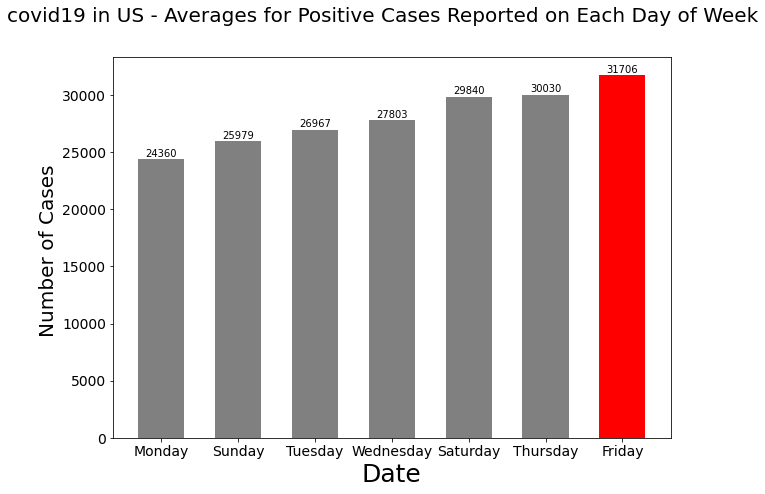

In [131]:
fig, (ax1) = plt.subplots(1, figsize=(10,7))
fig.suptitle('covid19 in US - Averages for Positive Cases Reported on Each Day of Week', fontsize=20)

y = weekday_sorted.Average_no_of_cases
x = weekday_sorted.Day


# assigning grey colour to all bars except for max value which is red
clrs = ['grey' if (x < max(weekday_sorted.Average_no_of_cases)) else 'red' for x in weekday_sorted.Average_no_of_cases ]

# plot the data
plot = plt.bar(x,y, label='Day of Week Ave', color=clrs, width=0.6)

# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., #positoning the text label on top of each bar
             1.002*height,'%d' % int(height), ha='center', va='bottom')

# Add axis labels
plt.xlabel("Date", fontsize=25)
plt.ylabel("Number of Cases ", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# show the plot
plt.show()


**7.3 Exploring Deaths Data**

We will also just have a quick look at deaths data

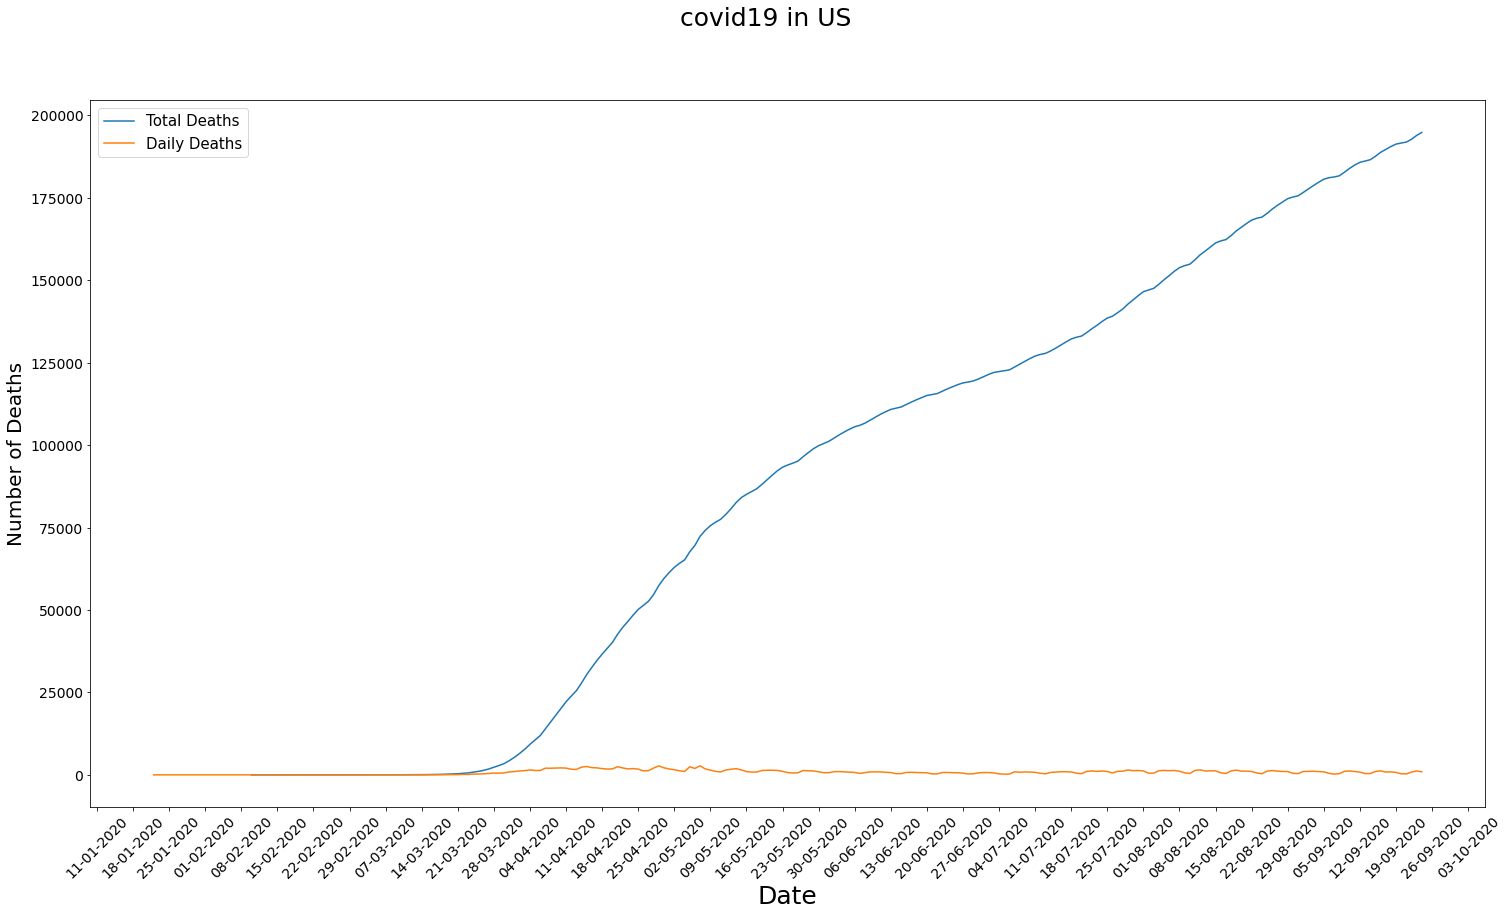

In [132]:
import numpy as np #plotting Total v Total Daily deaths
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=(25,13))
fig.suptitle('covid19 in US', fontsize=25)

x = df['date']
y1 = df.death
y2 = df.deathIncrease

# plot the data
plt.plot(x,y1,label='Total Deaths')
plt.plot(x,y2,label='Daily Deaths')


# Add axis labels
plt.xlabel("Date", fontsize=25)
plt.ylabel("Number of Deaths", fontsize=20)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the data
plt.legend(fontsize = 15, loc = 2)
plt.show()

It has also become clear that the Daily Deaths need to be plotted on their own plot as they are on a different scale

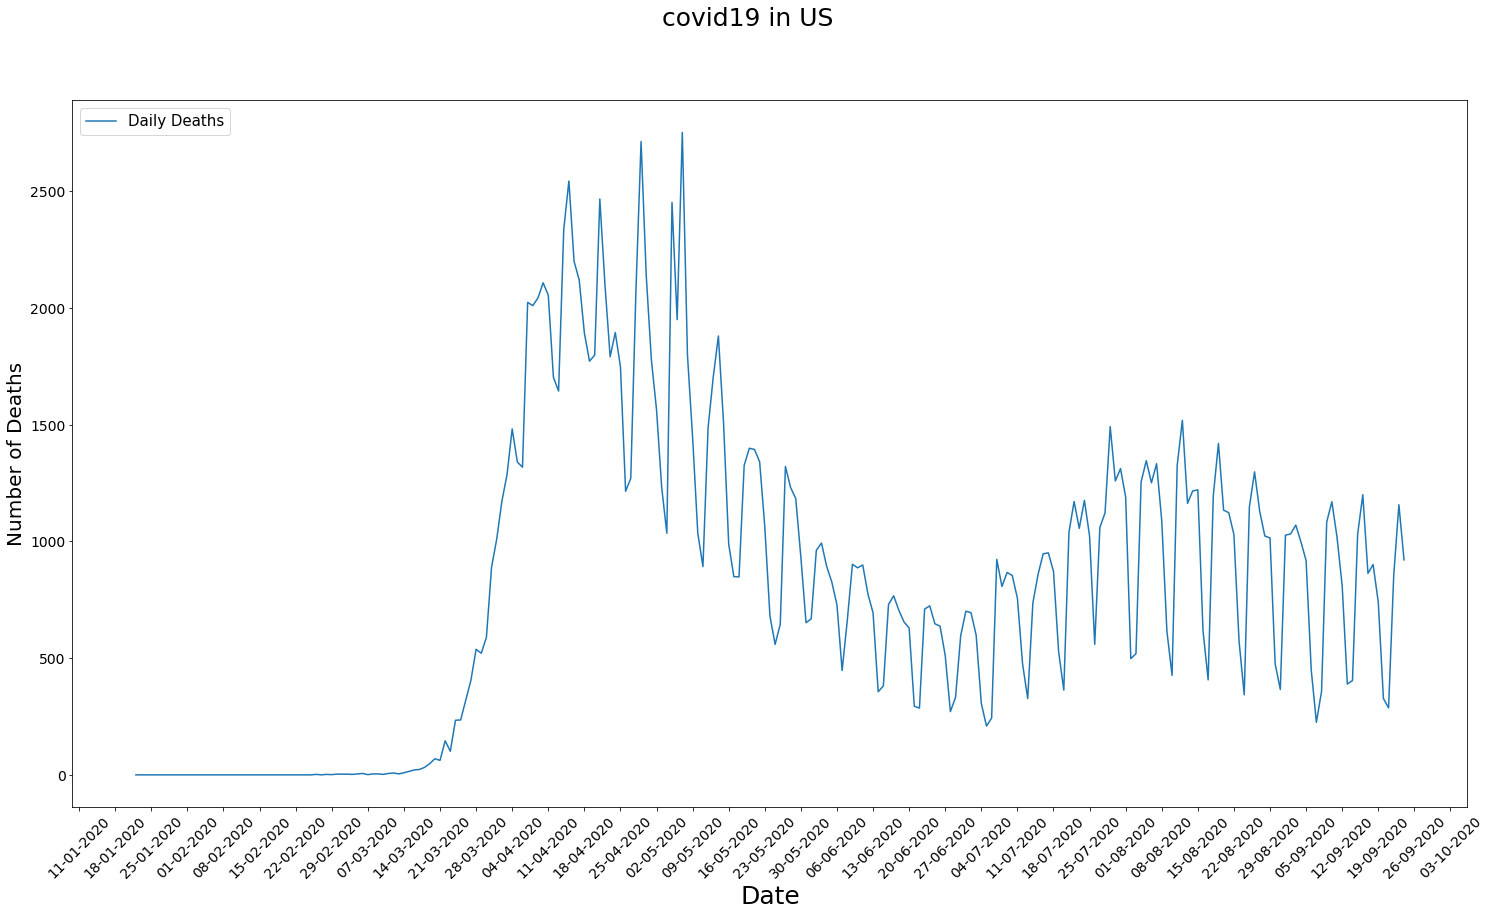

In [133]:
import numpy as np #plotting Total v Total Daily deaths
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=(25,13))
fig.suptitle('covid19 in US', fontsize=25)

x = df['date']

y2 = df.deathIncrease

# plot the data
plt.plot(x,y2,label='Daily Deaths')


# Add axis labels
plt.xlabel("Date", fontsize=25)
plt.ylabel("Number of Deaths", fontsize=20)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

#Adjust date for x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week

# show the data
plt.legend(fontsize = 15, loc = 2)
plt.show()

**7.4 Exploring ICU  Data**

We will also just have a quick look at Hospital Capactiy data. We will check the numbers of people in ICU, On Ventilators and in Hospital and will also show number of deaths on the same plot

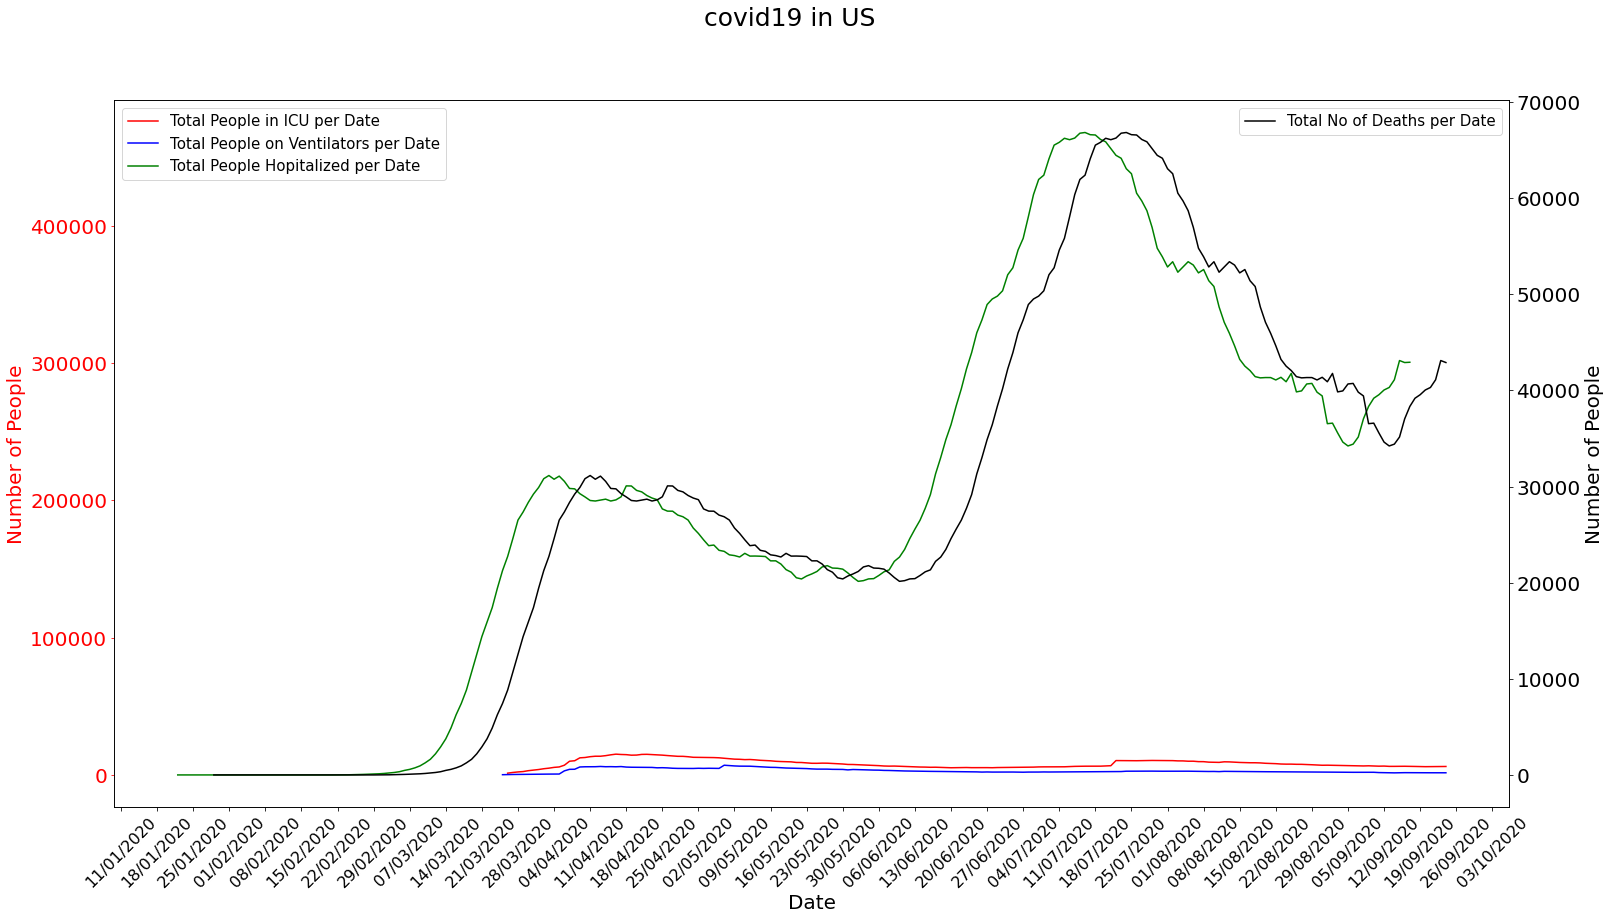

In [147]:
import matplotlib.dates as mdates #using mdates to format our x axis date formats
datesformat = mdates.DateFormatter('%d/%m/%Y') #Setting a myFormat variable to mean d/m/y


# create figure and axis objects with subplots()
fig, ax1 = plt.subplots(1, figsize=(25,13))
fig.suptitle('covid19 in US', fontsize=25)

x = df['date']
y1 = df.inIcuCurrently
y2 = df.onVentilatorCurrently

# make a plot
ax1.plot(x,y1,label='Total People in ICU per Date', color = 'red')
ax1.plot(x,y2,label='Total People on Ventilators per Date',  color = 'blue')
ax1.plot(x,y3,label='Total People Hopitalized per Date',  color = 'green')



# set x-axis label
ax1.set_xlabel("Date",fontsize=20)
ax1.tick_params(axis="x", labelsize=16,  rotation=45)

# set y-axis label
ax1.set_ylabel("Number of People",color="red",fontsize=20)
ax1.tick_params(axis="y", colors="red", labelsize=20)


# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x,y4,label='Total No of Deaths per Date',  color = 'Black')
ax2.set_ylabel("Number of People",color="black", fontsize=20)
ax2.tick_params(axis='y', labelsize=20)


ax1.legend(fontsize = 15, loc = 2)
ax2.legend(fontsize = 15, loc = 1)
ax1.xaxis.set_major_formatter(datesformat) #using previously defined date format of d/m/Y
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week
plt.show()


Lets take a closer look at the numbers in ICU and On Ventilators versus Daily Deaths

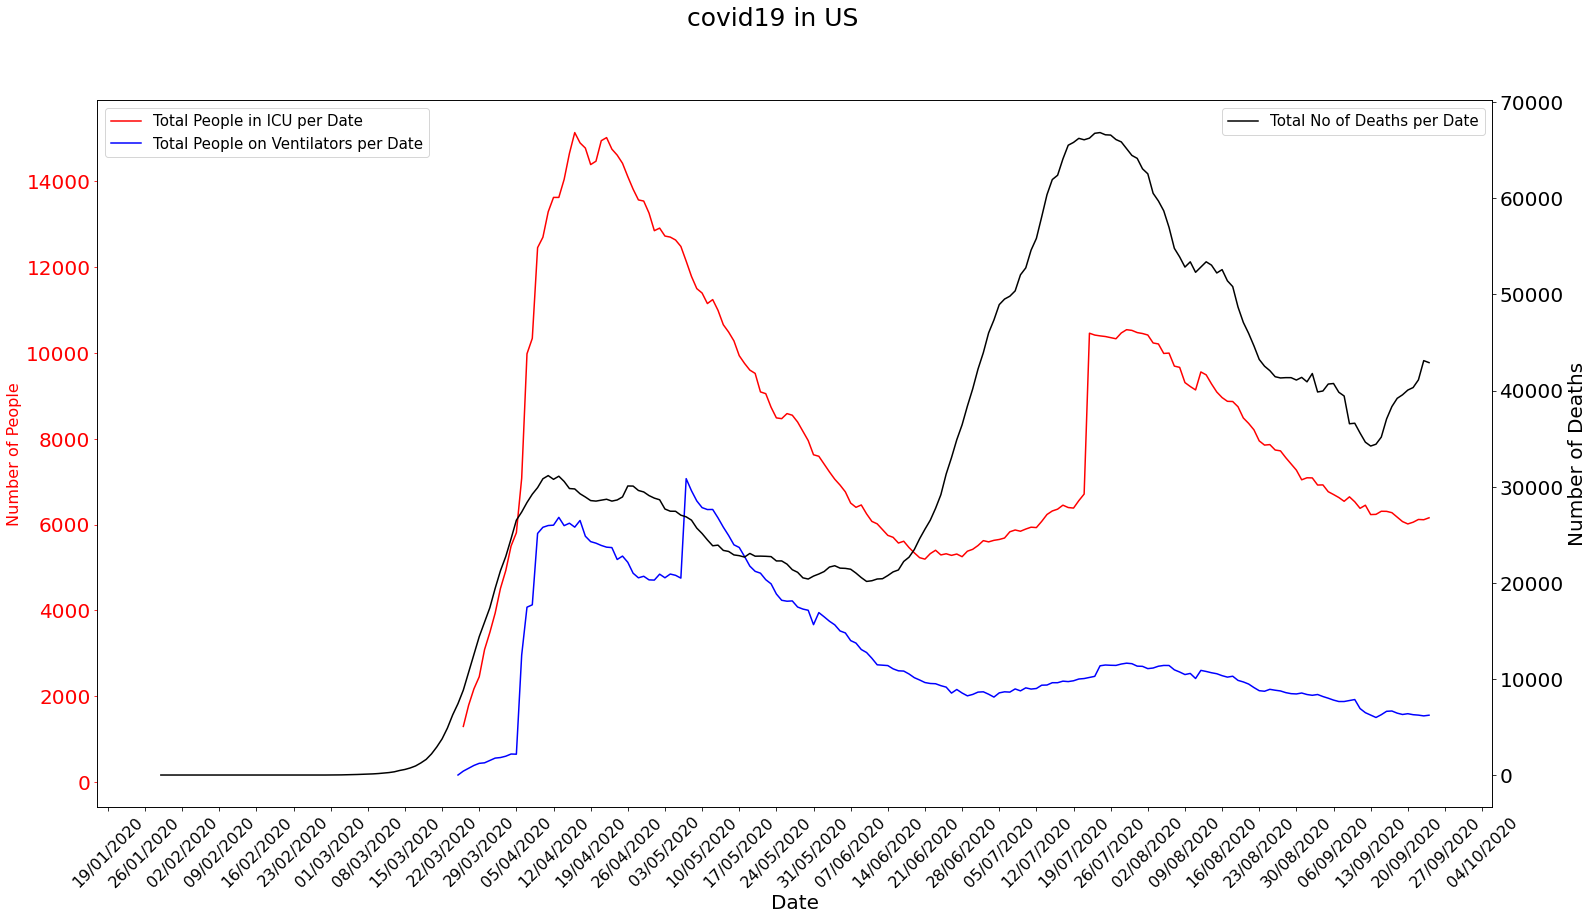

In [153]:
# create figure and axis objects with subplots()
fig, ax1 = plt.subplots(1, figsize=(25,13))
fig.suptitle('covid19 in US', fontsize=25)

x = df['date']
y1 = df.inIcuCurrently
y2 = df.onVentilatorCurrently

# make a plot
ax1.plot(x,y1,label='Total People in ICU per Date',  color = 'red')
ax1.plot(x,y2,label='Total People on Ventilators per Date',  color = 'blue')



# set x-axis label
ax1.set_xlabel("Date",fontsize=20)
ax1.tick_params(axis="x", labelsize=16,  rotation=45)

# set y-axis label
ax1.set_ylabel("Number of People",color="red",fontsize=16)
ax1.tick_params(axis="y", colors="red", labelsize=20)


# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x,y4,label='Total No of Deaths per Date',  color = 'Black')
ax2.set_ylabel("Number of Deaths",color="black",fontsize=20)
ax2.tick_params(axis='y', labelsize=20)

#show the plot
ax1.legend(fontsize = 15, loc = 2)
ax2.legend(fontsize = 15, loc = 1)
ax1.xaxis.set_major_formatter(datesformat) #using previously defined date format of d/m/Y
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7)) #setting interval of a week
plt.show()

